# Compte rendu mini projet sur Mars
### Antoine Molines

## But:
Le but de ce mini projet est de créer un modèle d'orbite pour la Terre et Mars afin de calculer l'angle de longitude apparente de Mars vu depuis la Terre afin de rendre compte du mouvement rétrograde de Mars, phénomène visuel par lequel on voit Mars "reculer" dans le ciel lors d'une année terrestre (comme illustré ci-dessous). Nous allons ensuite comparer les résultats obtenus par le modèle avec des données expérimentales.

![2014-2016-mars-retrograde-earth-night-sky-samples.jpg](./2014-2016-mars-retrograde-earth-night-sky-samples.jpg)\


## Théorie et modèle:
Pour créer ce modèle, nous allons utiliser les lois de Newton pour une trajectoire circulaire uniforme (c'est à dire à vitesse tangentielle constante). Bien que les orbites sont naturellement légèrement elliptiques, nous faisons l'hypothèse d'une orbite circulaire afin d'alléger les calculs et d'avoir une bonne approximation et une prediction relativement correcte. Nous faisons aussi l'hypothèse que les deux orbites sont dans le même plans (écliptique). Les équations horaires pour un mouvement circulaire uniforme, en fonction du Rayon de l'orbite $R$, de la période de révolution $T$, de la phase à l'origine $\phi_0$ et du temps $t$ sont: $$x(t)=R \cos \left( \frac{2\pi t}{T}+\phi_0 \right) $$ et $$y(t)=R \sin \left( \frac{2\pi t}{T}+\phi_0 \right) $$ Les données que nous allons utiliser pour modéliser les orbites sont:\\
Le rayon de l'orbite de la Terre: $RO_t=1 UA$\
Le rayon de l'orbite de Mars: $RO_m=1.52371 UA$\
La période de révolution de la Terre: $T_t=365.256 jours$\
La période de révolution de Mars: $T_m= 686.885 jours$\
Avec: $1 UA=1496\times 10^8 km$\
\
En utilisant ces données et les équations de Newton, on peut modéliser par un code python les orbites de Mars et de la Terre:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

#conversions unités pour avoir tout en SI:
conv_UA_m=1.496e11     #UA en m
conv_J_s=86400         #Jours en secondes

#données utilisées en SI:
ROt=1*conv_UA_m        #Rayon de l'orbite de la Terre
ROm=1.52371*conv_UA_m  #Rayon de l'orbite de Mars
Tt=365.256*conv_J_s    #Période de révolution de la Terre
Tm=686.885*conv_J_s    #Période de révolution de Mars

pi=math.pi 
phi_0_T= -pi/2         #Phase à l'originie pour la Terre
phi_0_M= 0             #Phase à l'originie pour Mars

Ici, nous avons juste défini les données et variables utilisées pour le modèle des orbites, et nous avons tout converti en unités du système international. Les angles pour les phases à l'origine ont été choisis arbitrairement, seulement pour l'affichage (pour l'instant).\
Ensuite, nous définissons un tableau numpy pour le temps:

In [ ]:
# Définition du temps en dates (du 1er janvier 2016 au 12 décembre 2016)
date_debut = "2016-01-01"
date_fin = "2017-12-12"
dates = pd.date_range(start=date_debut, end=date_fin, freq="D")  # Intervalle de 1 jour

# Conversion en secondes pour les calculs
temps = np.linspace(0, len(dates) * conv_J_s, len(dates))


Ici, nous avons d'une part créé un index Panda pour avoir le temps en dates avec les dates de début et de fin qui correspondent aux données, afin de pouvoir comparer avec les données expérimentales, et d'autre part un tableau numpy converti en secondes pour pouvoir faire les calculs.


Nous pouvons donc tracer les trajectoires des orbites dans le référentiel héliocentrique en utilisant les données et les équations de Newton.

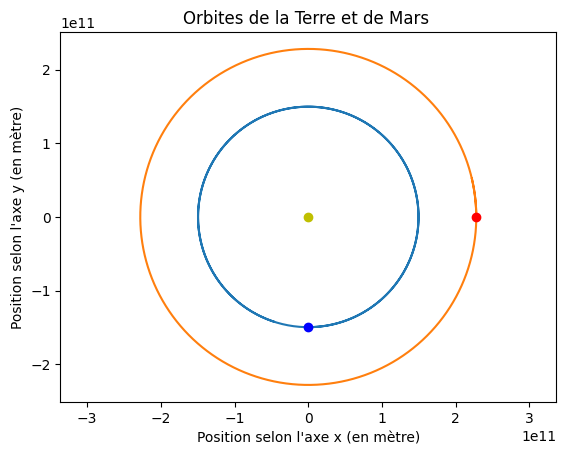

In [6]:
#équation du mouvement pour la Terre:
XT_t=(ROt)*np.cos((2*pi*temps)/(Tt)+phi_0_T)
YT_t=(ROt)*np.sin((2*pi*temps)/(Tt)+phi_0_T)

#équation du mouvement pour Mars:
XM_t=(ROm)*np.cos((2*pi*temps)/(Tm)+phi_0_M)
YM_t=(ROm)*np.sin((2*pi*temps)/(Tm)+phi_0_M)


#Positions initiales:
XT_t_0=(ROt)*np.cos((2*pi*0)/(Tt)+phi_0_T)   #pour la Terre
YT_t_0=(ROt)*np.sin((2*pi*0)/(Tt)+phi_0_T)

XM_t_0=(ROm)*np.cos((2*pi*0)/(Tm)+phi_0_M)   #pour Mars
YM_t_0=(ROm)*np.sin((2*pi*0)/(Tm)+phi_0_M)



#affichage des orbites
plt.plot(XT_t, YT_t)
plt.plot(XM_t, YM_t)
plt.plot(0,0,"yo")
plt.plot(XT_t_0,YT_t_0, "bo")
plt.plot(XM_t_0,YM_t_0, "ro")
plt.title("Orbites de la Terre et de Mars ")
plt.xlabel("Position selon l'axe x (en mètre)")
plt.ylabel("Position selon l'axe y (en mètre)")
plt.axis("equal")
plt.show()

Le point jaune à l'origine du graphique représente le Soleil, et les points rouge et bleu représentent les coordonnées initales de Mars et de la Terre. On voit bien que l'orbite de Mars est plus grande que celle de la Terre. Nous avons mis l'intervalle de temps à deux années pour visualiser l'orbite complète de Mars, car sa période de révolution est à peu près deux fois celle de la Terre.\
Nous avons donc bien un modèle représentatif des mouvmements orbitaux des plantètes qui va nous permettre de calculer la longitude apparente de Mars vue de la Terre.

## Détermination de l'angle apparent de longitude
Comme illustré sur cette figure:\
![solar.png](solar.png)\
l'angle de longitude $\Phi_{app}$ est donné par: $$\tan(\Phi{app})=\frac{y_m(t)-y_T(t)}{x_m(t)-x_T(t)}$$\
où $y_m(t)$ et $y_T(t)$ correspondent aux composantes selon l'axe $y$ de l'orbite de Mars et de la Terre, et $x_m(t)$ et $x_T(t)$ correspondent aux composantes selon l'axe $x$ de l'orbite.\
On a donc: $$\Phi{app}=\arctan \left( \frac{y_m(t)-y_T(t)}{x_m(t)-x_T(t)} \right)$$

On peut donc calculer l'angle sur python:

In [7]:
#longitude de mars vue depuis la terre
phi_app_t=np.arctan2((YM_t-YT_t),(XM_t-XT_t))
phi_en_degrés=phi_app_t*(180/pi)            #conversion en dégrés

Nous avons utilisé la fonction numpy.arctan2 car elle renvoie des valeurs entre -180 et 180 degrés, des valeurs mieux adaptées pour notre modèle. Nous avons aussi converti en degrés pour faire correspondre avec les données expérimentales. Nous pouvons donc faire un graphique de la longitude relative:


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

#conversions unités pour avoir tout en SI:
conv_UA_m=1.496e11     #UA en m
conv_J_s=86400         #Jours en secondes

#données utilisées en SI:
ROt=1*conv_UA_m        #Rayon de l'orbite de la Terre
ROm=1.52371*conv_UA_m  #Rayon de l'orbite de Mars
Tt=365.256*conv_J_s    #Période de révolution de la Terre
Tm=686.885*conv_J_s    #Période de révolution de Mars

pi=math.pi 
phi_0_T= -pi/2         #Phase à l'originie pour la Terre
phi_0_M= 0             #Phase à l'originie pour Mars

# Définition du temps en dates (du 1er janvier 2016 au 12 décembre 2016)
date_debut = "2016-01-01"
date_fin = "2016-12-12"
dates = pd.date_range(start=date_debut, end=date_fin, freq="D")  # Intervalle de 1 jour

# Conversion en secondes pour les calculs
temps = np.linspace(0, len(dates) * conv_J_s, len(dates))

#équation du mouvement pour la Terre:
XT_t=(ROt)*np.cos((2*pi*temps)/(Tt)+phi_0_T)
YT_t=(ROt)*np.sin((2*pi*temps)/(Tt)+phi_0_T)

#équation du mouvement pour Mars:
XM_t=(ROm)*np.cos((2*pi*temps)/(Tm)+phi_0_M)
YM_t=(ROm)*np.sin((2*pi*temps)/(Tm)+phi_0_M)


#Positions initiales:
XT_t_0=(ROt)*np.cos((2*pi*0)/(Tt)+phi_0_T)   #pour la Terre
YT_t_0=(ROt)*np.sin((2*pi*0)/(Tt)+phi_0_T)

XM_t_0=(ROm)*np.cos((2*pi*0)/(Tm)+phi_0_M)   #pour Mars
YM_t_0=(ROm)*np.sin((2*pi*0)/(Tm)+phi_0_M)

phi_app_t=np.arctan2((YM_t-YT_t),(XM_t-XT_t))
phi_en_degrés=phi_app_t*(180/pi)




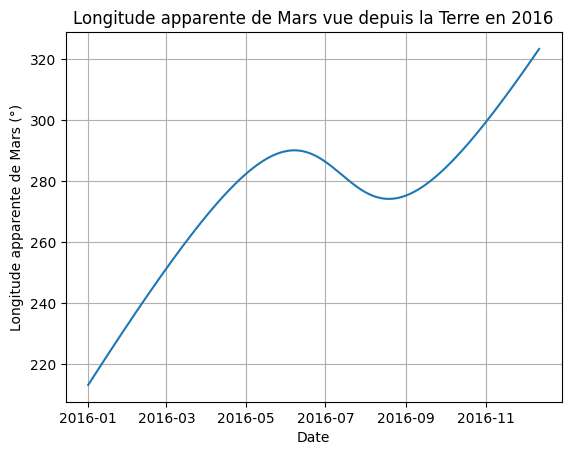

In [9]:
#affichage de la longitude apparente
plt.plot(dates, phi_en_degrés+180)
plt.grid()
plt.xlabel("Date")
plt.ylabel("Longitude apparente de Mars (°)")
plt.title("Longitude apparente de Mars vue depuis la Terre en 2016")
plt.show()

Ici, nous avons refait tout le code fait avant (code caché), mais avec un intervalle de temps d'une seule année pour avoir le même intervalle de temps que les données expérimentales afin de comparer. Nous avons utilisé les mêmes phases à l'origine qu'utilisées précédemment pour les deux planètes. Nous avons fait $+180$ pour revenir aux valeurs qu'aurait donnée la fonction numpy.arctan\
Nous observons bien une "bosse", dont le minimum correspond au moment où la Terre et Mars sont alignées, puis une augmentation de l'angle qui correspond au moment où la Terre "dépasse" Mars. Nous avons donc bien rendu compte du mouvement rétrograde de Mars.

## Comparaison avec les données expérimentales et ajustement

Les données expérimentales de la longitude de Mars sont données dans le fichier DataMars.csv, que nous pouvons lire sur python grâce à la fonction read.csv: 

In [11]:
# Chargement du fichier
dm = pd.read_csv("DataMars.csv", sep=",", comment="#")

# Extraction des données de longitude de Mars
mars = dm["Longitude (decimal)"]
dmars = mars[306:653]  # Sélection de la plage des données
print(dmars)

306    208.334925
307    208.889973
308    209.443630
309    209.995861
310    210.546630
          ...    
648    321.178068
649    321.931093
650    322.684389
651    323.437926
652    324.191676
Name: Longitude (decimal), Length: 347, dtype: float64


Nous avons choisi la plage de données correspondant à une année.

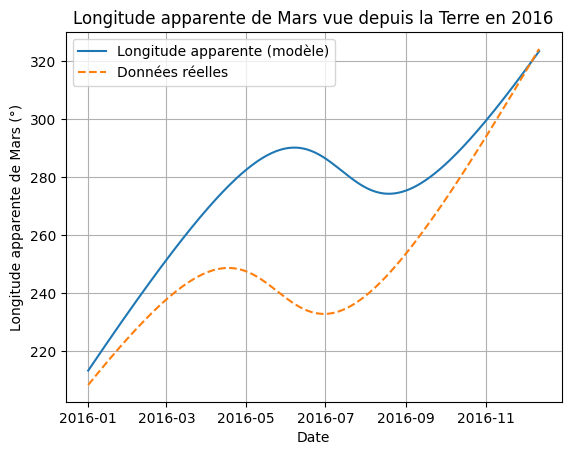

In [12]:
plt.plot(dates, phi_en_degrés+180, label="Longitude apparente (modèle)")
plt.plot(dates,dmars, label="Données réelles", linestyle="dashed")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Longitude apparente de Mars (°)")
plt.title("Longitude apparente de Mars vue depuis la Terre en 2016")
plt.legend()
plt.show()

En affichant les données de notre modèle et les données expérimentales sur le même graphe, nous voyons que bien que les courbes ont à peu près la même forme, elles ne correspondent pas l'une et l'autre. Ceci est dû au choix des angles de phase à l'origine, que nous avons choisi arbitrairement.\
En cherchant les meilleures valeurs de phase à l'origine (à la main), nous obtenons les valeurs: $\phi_{0t}=-1.3$, $\phi_{0m}=-0.2$\
Le graphe du modèle donne donc avec ces valeurs:

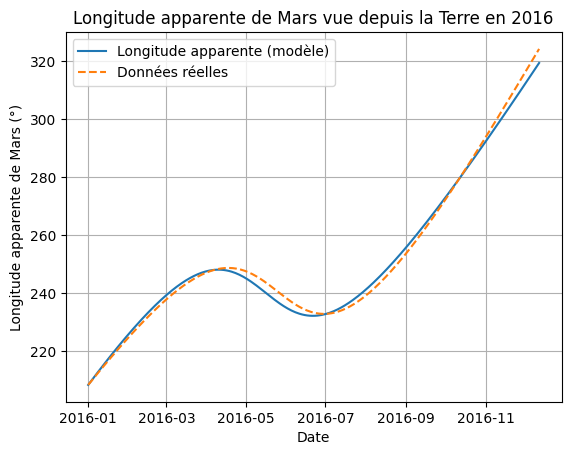

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd

#conversions unités pour avoir tout en SI:
conv_UA_m=1.496e11     #UA en m
conv_J_s=86400         #Jours en secondes

#données utilisées en SI:
ROt=1*conv_UA_m        #Rayon de l'orbite de la Terre
ROm=1.52371*conv_UA_m  #Rayon de l'orbite de Mars
Tt=365.256*conv_J_s    #Période de révolution de la Terre
Tm=686.885*conv_J_s    #Période de révolution de Mars

pi=math.pi 
phi_0_T= -1.3         #Phase à l'originie pour la Terre
phi_0_M= -0.2             #Phase à l'originie pour Mars

# Définition du temps en dates (du 1er janvier 2016 au 12 décembre 2016)
date_debut = "2016-01-01"
date_fin = "2016-12-12"
dates = pd.date_range(start=date_debut, end=date_fin, freq="D")  # Intervalle de 1 jour

# Conversion en secondes pour les calculs
temps = np.linspace(0, len(dates) * conv_J_s, len(dates))

#équation du mouvement pour la Terre:
XT_t=(ROt)*np.cos((2*pi*temps)/(Tt)+phi_0_T)
YT_t=(ROt)*np.sin((2*pi*temps)/(Tt)+phi_0_T)

#équation du mouvement pour Mars:
XM_t=(ROm)*np.cos((2*pi*temps)/(Tm)+phi_0_M)
YM_t=(ROm)*np.sin((2*pi*temps)/(Tm)+phi_0_M)


#Positions initiales:
XT_t_0=(ROt)*np.cos((2*pi*0)/(Tt)+phi_0_T)   #pour la Terre
YT_t_0=(ROt)*np.sin((2*pi*0)/(Tt)+phi_0_T)

XM_t_0=(ROm)*np.cos((2*pi*0)/(Tm)+phi_0_M)   #pour Mars
YM_t_0=(ROm)*np.sin((2*pi*0)/(Tm)+phi_0_M)

phi_app_t=np.arctan2((YM_t-YT_t),(XM_t-XT_t))
phi_en_degrés=phi_app_t*(180/pi)

# Chargement du fichier
dm = pd.read_csv("DataMars.csv", sep=",", comment="#")

# Extraction des données de longitude de Mars
mars = dm["Longitude (decimal)"]
dmars = mars[306:653]  # Sélection de la plage des données


plt.plot(dates, phi_en_degrés+180, label="Longitude apparente (modèle)")
plt.plot(dates,dmars, label="Données réelles", linestyle="dashed")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Longitude apparente de Mars (°)")
plt.title("Longitude apparente de Mars vue depuis la Terre en 2016")
plt.legend()
plt.show()

On voit bien qu'avec les bonnes valeurs de phases à l'origine, le modèle donne des valeurs très proches des données expérimentales. On oberserve bien que comme sur les données expérimentales, le centre de la boucle peut s'observer à la date du 25 mai 2016, à la longitude d'environ 240° La faible erreur vient probablement du fait que les données réelles sont issues d'une orbite elliptique et avec une faible inclinaison par rapport à l'écliptique, ainsi que de la manière dont les phases à l'origine ont été calculées (à la main).  

## Conclusion
Pour conclure, nous avons bien réussi à rendre compte du mouvement rétrograde de Mars en calculant à partir d'un modèle d'orbite plane et circulaire la longitude apparente de Mars par rapport à la Terre. Les hypothèses sur l'orbite se sont révélées relativement bien prédictives par rapport aux données réelles. La prédiction aurait pu être meilleure en utilisant une autre méthode pour calculer les angles de phases à l'origine.
